# Redes neuronales artificiales

En el siguiente ejemplo se entrena una red neuronal con la operación XOR

In [1]:
import tensorflow as tf
import numpy as np

from keras.layers import Dense
from keras.models import Sequential

In [2]:
# cargamos las 4 combinaciones de las compuertas XOR
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0]], "float32")

# Definición de redes neuronales utilizando Keras y TensorFlow

In [ ]:
model = Sequential()
model.add(Dense(4, input_shape=(2,)))
model.add(Dense(100,activation='relu', input_shape=(2,)))
model.add(Dense(1, activation='sigmoid' ))

## Información del modelo

In [ ]:
#resumen completo de cada capa
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 4)                 12        
                                                                 
 dense_84 (Dense)            (None, 100)               500       
                                                                 
 dense_85 (Dense)            (None, 1)                 101       
                                                                 
Total params: 613 (2.39 KB)
Trainable params: 613 (2.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#información concreta de las capas
capa = model.layers[2]
print(capa.name)

#obtener pesos y sesgo
pesos, sesgos = capa.get_weights()
print("pesos:")
print(pesos.shape)
print(pesos)

print("sesgos:")
print(sesgos.shape)
print(sesgos)

dense_27
pesos:
(100, 1)
[[-5.9352231e-01]
 [-4.1125759e-01]
 [-2.3807617e-01]
 [-3.5783038e-01]
 [ 6.0706109e-01]
 [-5.0398365e-02]
 [ 5.4473709e-04]
 [-1.3814983e-01]
 [ 5.1294017e-01]
 [ 6.4884681e-01]
 [ 4.6517339e-01]
 [ 4.5090124e-01]
 [ 1.3752924e-01]
 [ 3.1041899e-01]
 [ 6.0883772e-01]
 [-3.3186856e-01]
 [-1.5879002e-01]
 [ 8.6856827e-02]
 [-4.7744349e-01]
 [-5.5770308e-01]
 [ 3.3616576e-01]
 [ 4.5029745e-01]
 [-5.1318073e-01]
 [-5.8320957e-01]
 [-5.3734255e-01]
 [ 3.5002139e-01]
 [ 2.4856295e-01]
 [-4.0660718e-01]
 [-3.6429852e-02]
 [ 3.0616003e-01]
 [-5.4331350e-01]
 [ 4.4130743e-01]
 [ 8.3092667e-02]
 [-4.0227732e-01]
 [ 4.7493111e-03]
 [ 5.6601131e-01]
 [ 1.6226250e-01]
 [ 2.9854596e-02]
 [-8.2136989e-02]
 [ 5.2765787e-02]
 [ 3.7616384e-01]
 [-6.4529592e-01]
 [-5.3191602e-01]
 [ 2.0590669e-01]
 [-4.8874152e-01]
 [ 1.1434842e-01]
 [-1.9162762e-01]
 [-5.4545927e-01]
 [ 4.8751095e-01]
 [-4.8955098e-01]
 [ 1.5116892e-02]
 [-1.3756728e-01]
 [-5.3076857e-01]
 [ 3.8499987e-01]
 [ 

# Compilar Red Neuronal Artificial

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

# Entrenamiento de una red neuronal

In [ ]:
from keras.callbacks import LambdaCallback

#print_weights = LambdaCallback(on_epoch_end=lambda batch, logs: print(model.layers[1].get_weights()))

In [ ]:
#history = model.fit(training_data, target_data, epochs=1000, verbose=False, callbacks = [print_weights]) #verbose= Fase para que no salga todo

history = model.fit(training_data, target_data, epochs=1000, verbose=False) #verbose= Fase para que no salga todo

## Información entrenamiento

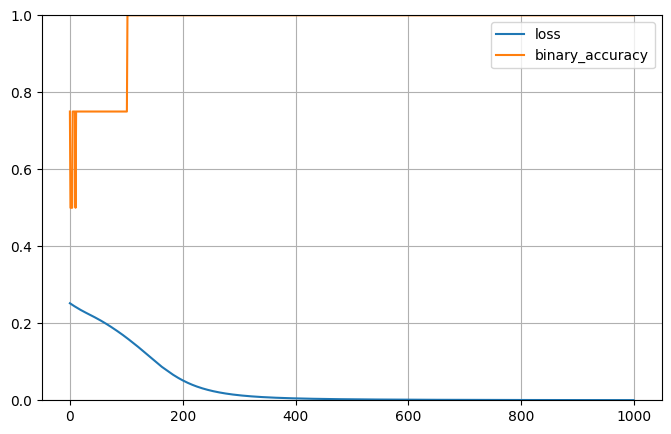

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #el rango vertical
plt.show()

# Evaluación

In [ ]:
# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 [==============================] - 0s 135ms/step - loss: 0.0413 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 70ms/step
[[0.]
 [1.]
 [1.]
 [0.]]


# Ejercicio 1.

Implementa una red neuronal que permita realizar operaciones AND

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[0],[0],[1]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(4,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 138ms/step - loss: 0.1278 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 51ms/step
[[0.]
 [0.]
 [0.]
 [1.]]


# Ejercicio 2.

Implementa una red neuronal que permita realizar operaciones OR

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[1],[1],[1]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 129ms/step - loss: 0.1332 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 57ms/step
[[0.]
 [1.]
 [1.]
 [1.]]


In [ ]:
print (model.predict(training_data))

1/1 [==============================] - 0s 22ms/step
[[0.3845803 ]
 [0.98092836]
 [0.9765215 ]
 [0.9955803 ]]


# Ejercicio 3.

Implementa una red neuronal que permita realizar operaciones NOT

In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([[0],
                          [1]], "float32")

target_data = np.array([[1],[0]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(1,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='rmsprop',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

1/1 [==============================] - 0s 136ms/step - loss: 0.1538 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 53ms/step
[[1.]
 [0.]]


# Ejercicio 4.

Implementa una red neuronal que permita realizar operaciones "A and not(B)"


In [ ]:
# PREPARACIÓN DE DATOS
training_data = np.array([ [0,0],
                           [0,1],
                           [1,0],
                           [1,1]], "float32")

target_data = np.array([[0],[0],[1],[0]], "float32")


#CONFIGURAR ARQUITECTURA RED NEURONAL
model = Sequential([
    Dense(16,activation='relu', input_shape=(2,), kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid' )
])

#COMPILAR RED NEURONAL
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer='adam',
              metrics=['binary_accuracy'])

#ENTRENAR ARQUITECTURA RED NEURONAL
history = model.fit(training_data,
                    target_data,
                    epochs=1000, verbose=False) #verbose= Fase para que no salga todo

#EVALUAR ARQUITECTURA RED NEURONAL
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())


1/1 [==============================] - 0s 137ms/step - loss: 0.0210 - binary_accuracy: 1.0000

binary_accuracy: 100.00%
1/1 [==============================] - 0s 61ms/step
[[0.]
 [0.]
 [1.]
 [0.]]
